In [15]:
"""
1. 08_wine.csv 데이터 사용
2. 전처리 및 가공 처리하기
3. DNN 모델 생성하기(계층은 자유롭게)
4. 성능 향상을 위한 방법 자유롭게
5. 콜백함수 사용
6. 훈련 횟수 자유롭게
7. 분류모델 평가하기(머신러닝에서 수행했던 평가, 매트릭스 시각화 포함)
8. 평가 결과 해석하기

-> 최종 결과 파일 제출 : 파일명은 03_DNN_분류분석_홍길도.ipynb
-> 구글드라이브에 제출
"""

'\n1. 08_wine.csv 데이터 사용\n2. 전처리 및 가공 처리하기\n3. DNN 모델 생성하기(계층은 자유롭게)\n4. 성능 향상을 위한 방법 자유롭게\n5. 콜백함수 사용\n6. 훈련 횟수 자유롭게\n7. 분류모델 평가하기(머신러닝에서 수행했던 평가, 매트릭스 시각화 포함)\n8. 평가 결과 해석하기\n\n-> 최종 결과 파일 제출 : 파일명은 03_DNN_분류분석_홍길도.ipynb\n-> 구글드라이브에 제출\n'

In [1]:
### 텐서플로우 프레임워크(패키지라고도 칭함)
import tensorflow as tf

### 케라스 라이브러리 불러들이기
from tensorflow import keras

from keras.layers import Input, Dense
from keras.models import Sequential                  # 순차 모델 클래스
from keras.layers import Dense, Dropout, Input       # 완전 연결층(Dense), 드롭아웃(Dropout) 레이어
from keras.regularizers import l2                    # L2 정규화 함수
from keras.callbacks import EarlyStopping, ModelCheckpoint           # 조기 종료 콜백 함수

### 판다스 라이브러리 불러들이기
import pandas as pd

### 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt
import seaborn as sns

### 넘파이
import numpy as np

### 훈련 및 테스트 데이터로 분류하는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 오차행렬 및 오차행렬도 라이브러리 정의하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score


### 딥러닝 랜덤 규칙 정의하기
# - 딥러닝에서의 랜덤 규칙은 항상 일정하게 유지되지는 않음
# - 딥러닝 모델 내부에서 훈련을 위한 데이터를 임의로 추출하여 사용(사람이 관여 안함)
tf.keras.utils.set_random_seed(42)

In [2]:
wine = pd.read_csv("./data/08_wine.csv")
print(wine.info())
print(wine.describe())
print(wine.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000
   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0


In [3]:
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


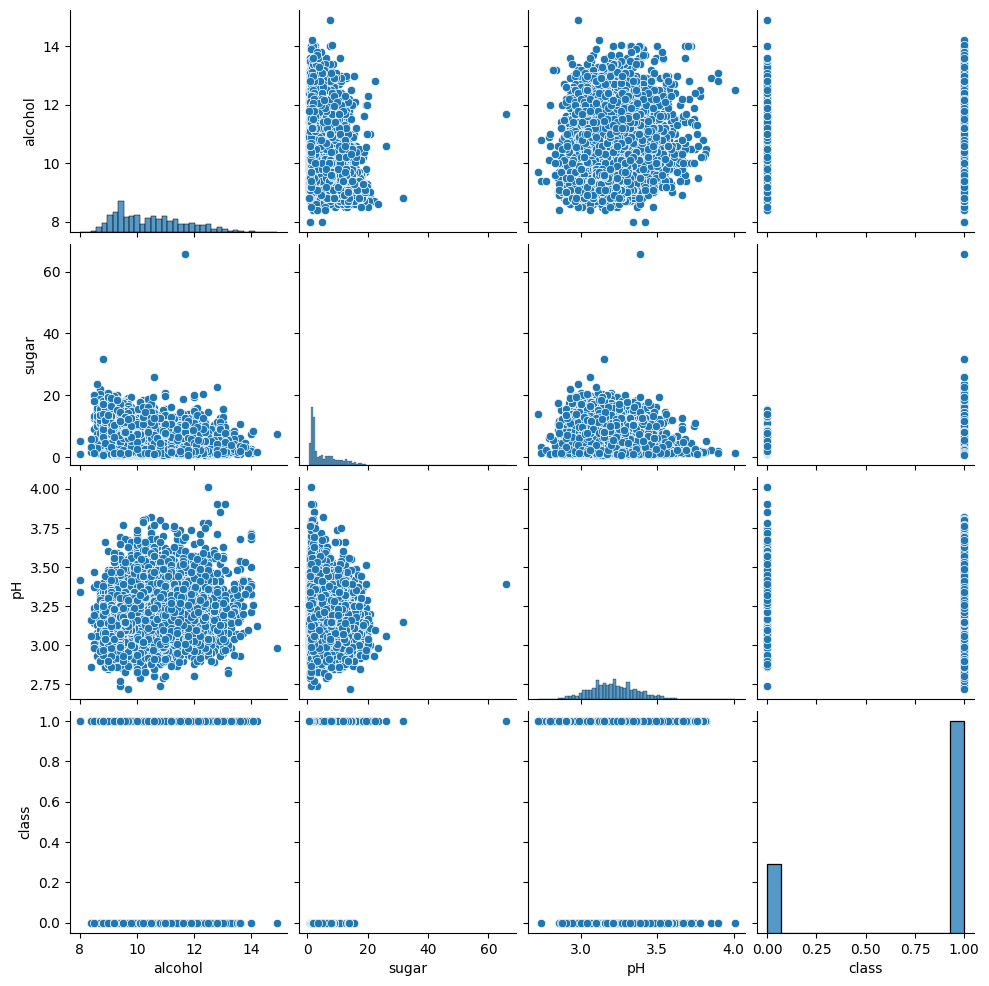

In [4]:
sns.pairplot(wine)
plt.show()

In [5]:
X = wine.iloc[:, :-1]
y = wine["class"]

X.shape, y.shape

((6497, 3), (6497,))

In [6]:
X_columns_nm = X.columns
X_columns_nm

Index(['alcohol', 'sugar', 'pH'], dtype='object')

In [7]:
from scipy.stats import spearmanr

spearmanr(X[X_columns_nm[0]], y)

for col in X_columns_nm:
    stat, p_value = spearmanr(X[col], y)
    print(f"[{col}] vs class : statistic={stat:.4f}, p_value={p_value:.4f}")
    
### (해석)
# - alcohol의 유의미계수는 0.1819로 p-value < 0.05에 따라 유의미 하지 않으며,
# - sugar와 pH 모두 p-value < 0.05 만족하므로 유의미 합니다.

[alcohol] vs class : statistic=0.0166, p_value=0.1819
[sugar] vs class : statistic=0.2565, p_value=0.0000
[pH] vs class : statistic=-0.3365, p_value=0.0000


In [8]:
X_processed = X.drop('alcohol', axis=1)
X_processed

,sugar,pH
0,1.9,3.51
1,2.6,3.20
2,2.3,3.26
3,1.9,3.16
4,1.9,3.51
...,...,...
6492,1.6,3.27
6493,8.0,3.15
6494,1.2,2.99
6495,1.1,3.34


In [9]:
ss = StandardScaler()
ss.fit(X_processed)
X_scaled = ss.transform(X_processed)

X_train, X_test, y_train, y_test = train_test_split(
                                                    X_scaled, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                    )

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5197, 2) (5197,)
(1300, 2) (1300,)


In [10]:
model = Sequential ([
    Input(shape=(2, )),
    ### 입력 계층
    Dense(64, activation="relu", name="Input_layer", kernel_regularizer=l2(0.001)),
    ### 은닉 계층
    Dense(32, activation="relu", name="Hidden_layer1"),
    Dense(16, activation='relu', name="Hidden_layer2"),
    ### 출력 계층
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 64)                192       
                                                                 
 Hidden_layer1 (Dense)       (None, 32)                2080      
                                                                 
 Hidden_layer2 (Dense)       (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [12]:
mc = ModelCheckpoint(
    "./model/best_binary_model.h5",
    save_best_only=True
)

es = EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [13]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=['accuracy']
    )

history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test), 
    epochs=1000, 
    batch_size=32, 
    callbacks=[mc, es]
    )

Epoch 1/1000
163/163 [==============================] - 2s 5ms/step - loss: 0.5409 - accuracy: 0.7610 - val_loss: 0.4311 - val_accuracy: 0.7962
Epoch 2/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.7903 - val_loss: 0.4123 - val_accuracy: 0.7923
Epoch 3/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.7924 - val_loss: 0.4096 - val_accuracy: 0.7954
Epoch 4/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.7916 - val_loss: 0.4063 - val_accuracy: 0.8000
Epoch 5/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.7953 - val_loss: 0.4014 - val_accuracy: 0.7992
Epoch 6/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.7985 - val_loss: 0.3962 - val_accuracy: 0.8069
Epoch 7/1000
163/163 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8062 - val_loss: 0.3836 - val_accuracy:

In [14]:
model_binary = keras.models.load_model("./model/best_binary_model.h5")

train_score = model_binary.evaluate(X_train, y_train)
val_score = model_binary.evaluate(X_test, y_test)

print(f"훈련 손실율 : {train_score[0]} / 훈련 정확도 : {train_score[1]}")
print(f"검증 손실율 : {val_score[0]} / 검증 정확도 : {val_score[1]}")

41/41 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8508
훈련 손실율 : 0.33452004194259644 / 훈련 정확도 : 0.8501058220863342
검증 손실율 : 0.33225831389427185 / 검증 정확도 : 0.8507692217826843


In [15]:
X_test

array([[-0.68171895,  0.50691489],
       [-0.05112738, -0.23947061],
       [ 1.56739096,  0.13372214],
       ...,
       [-0.34540345, -0.3638682 ],
       [-0.70273867,  1.25330039],
       [ 1.44127265, -1.42124765]])

In [16]:
y_pred = np.where(model_binary.predict(X_test) > 0.5, 1, 0)

41/41 [==============================] - 0s 1ms/step


In [17]:
y_test

1739    1.0
2845    1.0
5282    1.0
5822    1.0
5237    1.0
       ... 
1964    1.0
3002    1.0
14      0.0
2754    1.0
5496    1.0
Name: class, Length: 1300, dtype: float64

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[222,  98],
       [ 96, 884]], dtype=int64)

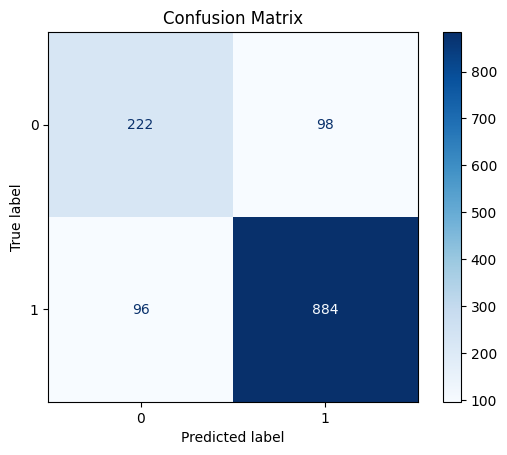

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


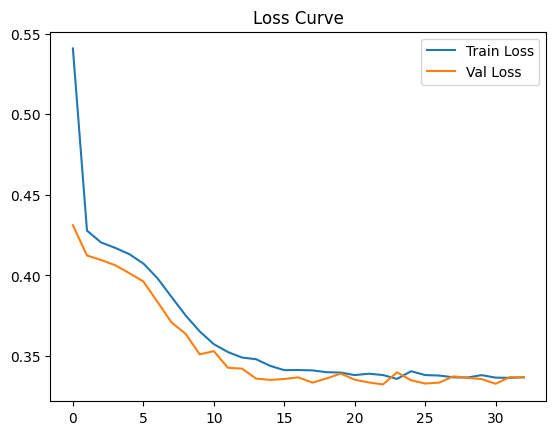

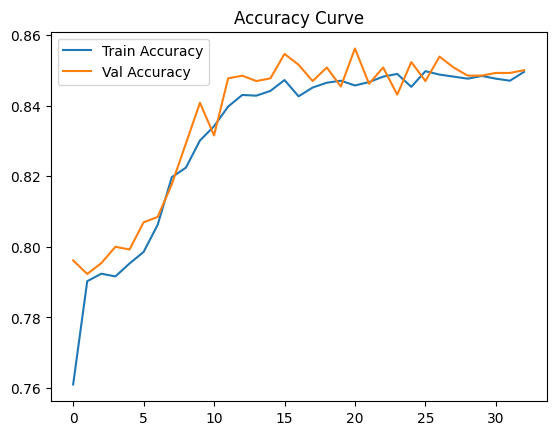

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

### (해석)
# 손실 곡선 (Loss Curve)
# Train Loss (훈련 손실): 훈련 데이터에 대한 손실이 감소하고 있습니다. 
#                         이는 모델이 훈련 데이터에 점점 더 잘 학습하고 있다는 것을 의미합니다.
# Val Loss (검증 손실): 검증 데이터에 대한 손실도 감소하고 있으며, 훈련 손실과 비슷한 추세를 보이고 있습니다. 
#                       이는 모델이 과적합 없이 일반화가 잘 되고 있음을 보여줍니다.
# 정확도 곡선 (Accuracy Curve)
# Train Accuracy (훈련 정확도): 훈련 데이터에 대한 정확도가 꾸준히 증가하고 있습니다.
#                               이는 모델이 훈련 데이터를 점점 더 잘 예측하고 있음을 나타냅니다.
# Val Accuracy (검증 정확도): 검증 데이터에 대한 정확도도 증가하고 있으며, 훈련 정확도와 비슷한 수준을 유지하고 있습니다. 
#                             이는 모델이 검증 데이터에서도 잘 작동하고 있음을 보여줍니다.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

### (해석)
# 혼동 행렬: TN=222, FP=98, FN=96, TP=884
# 정확도: 85.08%, 정밀도: 90.02%, 재현율: 90.20%, F1-score: 90.11%
# 정밀도/재현율 모두 높고 균형 좋음 → 실무 적용 가능 수준
# 이 모델은 정밀도와 재현율 모두 뛰어난 수준이며, 양성과 음성을 모두 잘 분류하고 있습니다.
# 실무에서도 사용 가능한 우수한 이진 분류 성능입니다.

정확도 (Accuracy): 0.8508
정밀도 (Precision): 0.9002
재현율 (Recall): 0.9020
F1-score: 0.9011
